In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# Option 1: Mount Google Drive
# X_train = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_train.xlsx')
# X_test = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_test.xlsx')
# y_train = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_train.xlsx')
# y_test = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_test.xlsx')

# Option 2: Downloaded Files
X_train = pd.read_excel('X_train.xlsx')
X_test = pd.read_excel('X_test.xlsx')
y_train = pd.read_excel('y_train.xlsx')
y_test = pd.read_excel('y_test.xlsx')

In [3]:
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (21024, 5)
X_test Shape: (5256, 5)
y_train Shape: (21024, 1)
y_test Shape: (5256, 1)


# Create and Test Model

In [4]:
import tensorflow as tf
import random
import os

# Used to have the same randomness/shuffle each time
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = '42'

In [5]:
# Build LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])

# Create model
model_lstm = Sequential([
    LSTM(128, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=False), # Input layer
    Dense(32, activation='relu'), # 1 hidden layer
    Dense(1)  # output layer
])

# Compile model
model_lstm.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
from sklearn.model_selection import train_test_split
# Split for validation set again
X_train_final, X_val, y_train_final, y_val = train_test_split(
                                                      X_train, y_train, test_size=0.1, random_state=42)

In [7]:
# Reshape for LSTM
X_train_final_reshaped = X_train_final.values.reshape(X_train_final.shape[0], 1, X_train_final.shape[1])
X_val_reshaped = X_val.values.reshape(X_val.shape[0], 1, X_val.shape[1])

In [8]:
# Train model
model_lstm.fit(
    X_train_final_reshaped, y_train_final,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_reshaped, y_val), # Validation data
    shuffle=False)

Epoch 1/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1058.7660 - val_loss: 62.3745
Epoch 2/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 64.2259 - val_loss: 37.0548
Epoch 3/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 46.2906 - val_loss: 28.6554
Epoch 4/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 37.9232 - val_loss: 24.1588
Epoch 5/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 32.0511 - val_loss: 20.4240
Epoch 6/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 25.3128 - val_loss: 20.0903
Epoch 7/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 26.0536 - val_loss: 20.7161
Epoch 8/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 21.3040 - val_loss: 17.6167
Epoch 9/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.9912 - val_loss: 19.3443
Epoch 10/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 20.6463 - val_loss: 11.4426
Epoch 11/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 16.9615 - val_loss: 9.2692
Epoch 12/100
592/5

In [9]:
# Predict with this model
X_test_reshaped = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1]) # reshape data
# Predict
y_pred_lstm = model_lstm.predict(X_test_reshaped)

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [10]:
# Show accuracy
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_lstm)
r2 = r2_score(y_test, y_pred_lstm)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# For epoch = 10, neuron = 64,
# mse = 11.97039, R2 = 0.992473
# For epoch = 100, neuron = 128,
# mse = 1.0264991521835327, R2 = 0.9993546009063721
# For epoch = 100, neuron = 64,
# mse = 2.7704477310180664, R2 = 0.9982580542564392

Mean Squared Error: 0.7429193258285522
R-squared: 0.9995328783988953


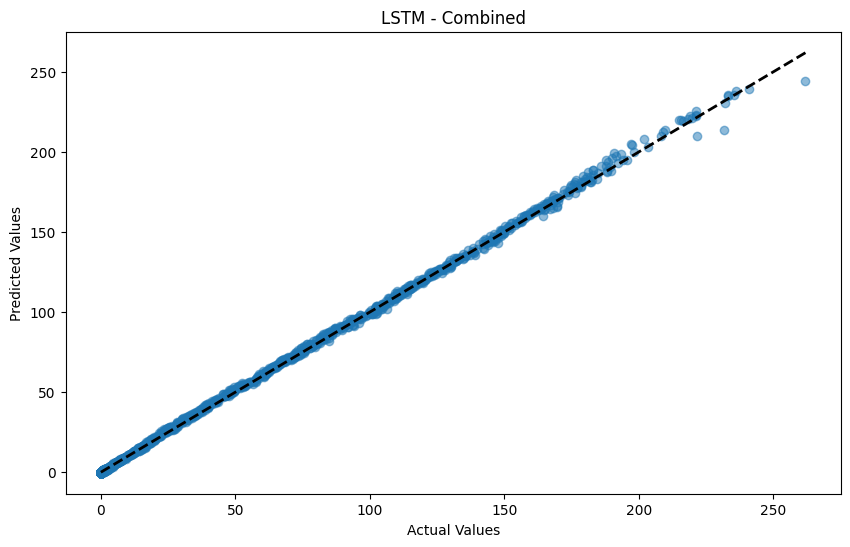

In [11]:
# Visualize model's results
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lstm, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.title('LSTM - Combined')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Predict with 2023 Data

In [12]:
# Import 2023 data
#from google.colab import drive
#drive.mount('/content/drive')

# Option 1: Mount Google Drive
# South
# import pandas as pd
# X_train_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/X_train_23.xlsx')
# X_test_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/X_test_23.xlsx')
# y_train_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/y_train_23.xlsx')
# y_test_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/y_test_23.xlsx')

# Extract target variable as 1D arrays
# y_train_23 = y_train_23['Energy'].values  # fixing added column issue
# y_test_23 = y_test_23['Energy'].values

# Option 2: Downloaded Files
X_train_23 = pd.read_excel('X_train_23.xlsx')
X_test_23 = pd.read_excel('X_test_23.xlsx')
y_train_23 = pd.read_excel('y_train_23.xlsx')['Energy']
y_test_23 = pd.read_excel('y_test_23.xlsx')['Energy']

In [13]:
# Shape
print('X_train 2023 shape:', X_train_23.shape)
print('X_test 2023 shape:', X_test_23.shape)
print('y_train 2023 shape:', y_train_23.shape)
print('y_test 2023 shape:', y_test_23.shape)

X_train 2023 shape: (21024, 5)
X_test 2023 shape: (5256, 5)
y_train 2023 shape: (21024,)
y_test 2023 shape: (5256,)


In [14]:
# Reshape data
X_test_23_reshape = X_test_23.values.reshape(X_test_23.shape[0], 1, X_test_23.shape[1])

In [15]:
# Predict with 2023 data
y_pred_23 = model_lstm.predict(X_test_23_reshape)  # Use X_test_23 for prediction
mse_test_23 = mean_squared_error(y_test_23, y_pred_23)  # Use y_test_23 for evaluation
r2_test_23 = r2_score(y_test_23, y_pred_23)
print('Test MSE South 2023:', mse_test_23)
print('Test R^2 South 2023:', r2_test_23)

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MSE South 2023: 213.08542202372772
Test R^2 South 2023: 0.8642388521177398


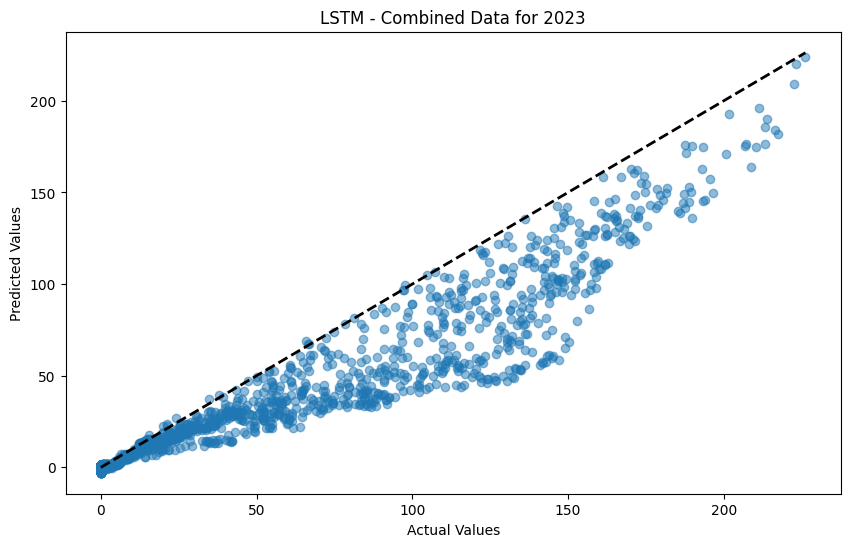

In [16]:
# Visualize model's results
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_23, y_pred_23, alpha=0.5)
plt.plot([y_test_23.min(), y_test_23.max()], [y_test_23.min(), y_test_23.max()], 'k--', lw=2)  # Diagonal line
plt.title('LSTM - Combined Data for 2023')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Energy vs Hour Plot

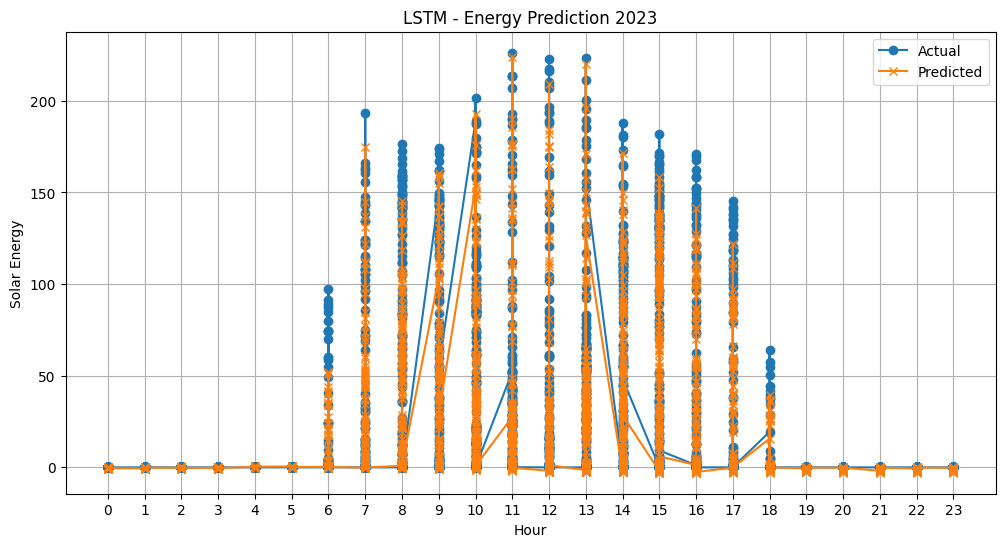

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# DataFrame to hold the data
results_df = pd.DataFrame({'Hour': X_test_23['Hour'], 'Actual': y_test_23, 'Predicted': y_pred_23.flatten()}) # flatten to fix shape

# Sort by hour
results_df = results_df.sort_values(by=['Hour']) # This will sort the dataframe based on hour which will help in plotting

# Plot actual and predicted values wrt hour
plt.figure(figsize=(12, 6))
plt.plot(results_df['Hour'], results_df['Actual'], label='Actual', marker='o')
plt.plot(results_df['Hour'], results_df['Predicted'], label='Predicted', marker='x')
plt.xlabel('Hour')
plt.ylabel('Solar Energy')
plt.title('LSTM - Energy Prediction 2023')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  # Set x-axis ticks to represent hours 0-23
plt.show()